In [28]:
import geopandas 

In [29]:
# access a url 
url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'

gdf = geopandas.read_file(filename=url)
gdf.nunique()

ID_ANNEX       1
ANNEXDESCR     1
ID_TEMA        1
TEMA_DESCR     1
ID_CONJUNT     1
CONJ_DESCR     1
ID_SUBCONJ     1
SCONJ_DESC     1
ID_ELEMENT     1
ELEM_DESCR     1
NIVELL         1
NDESCR_CA      1
NDESCR_ES      1
NDESCR_EN      1
TERME          1
DISTRICTE     10
BARRI          1
AEB            1
SEC_CENS       1
GRANBARRI      1
ZUA            1
AREA_I         1
LITERAL       10
PERIMETRE     10
AREA          10
ORD_REPRES     1
CODI_UA       10
TIPUS_UA       1
NOM           10
WEB1          10
WEB2          10
WEB3          10
DOCUMENTA      0
RANGESCALA     1
TIPUS_POL      0
GRUIX_ID       1
GRUIXDIMEN     1
ESTIL_ID       1
ESTIL_QGIS     1
VALOR1QGIS     1
VALOR2QGIS     1
COL_FARCIT     1
FCOL_DESCR     1
FHEX_COLOR     1
COL_DESCR      1
HEX_COLOR7     1
geometry      10
dtype: int64

In [30]:
# get all the columns name
gdf.columns

Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry'],
      dtype='object')

In [4]:
# check the CRS 
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
gdf['geometry']

0    POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...
1    POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2...
2    MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3...
3    POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2...
4    MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4...
5    POLYGON ((2.13629 41.42363, 2.1364 41.42358, 2...
6    POLYGON ((2.15949 41.44977, 2.15942 41.4496, 2...
7    POLYGON ((2.18706 41.46772, 2.18711 41.46711, ...
8    POLYGON ((2.18764 41.46212, 2.18765 41.46208, ...
9    POLYGON ((2.20736 41.42711, 2.20698 41.42665, ...
Name: geometry, dtype: geometry

In [6]:
# check the area
area = gdf['AREA'] / 1000000
area

0     4.204931
1     7.464303
2    22.879850
3     6.010769
4    19.915566
5     4.224278
6    11.919631
7     8.056468
8     6.592480
9    10.436698
Name: AREA, dtype: float64

In [7]:
# add the calculated area into a new coloumn
area = gdf['AREA'] / 1000000
gdf["Calculated_Area"] = area

gdf.head(2)

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,Calculated_Area
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...",4.204931
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2...",7.464303


In [8]:
# check the centtoid (the centre point of a geometry)
centre_point_of_gemometry = gdf.centroid 
centre_point_of_gemometry

C:\Users\Hasem\AppData\Local\Temp\ipykernel_13120\187917678.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centre_point_of_gemometry = gdf.centroid


0    POINT (2.18073 41.38113)
1    POINT (2.16447 41.39159)
2     POINT (2.14444 41.3498)
3    POINT (2.11824 41.38693)
4     POINT (2.10651 41.4126)
5    POINT (2.15222 41.41026)
6    POINT (2.15057 41.42916)
7    POINT (2.17507 41.44631)
8    POINT (2.19331 41.43504)
9    POINT (2.20104 41.40763)
dtype: geometry

In [9]:
gdf.to_crs(epsg=2062, inplace=True)
gdf

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,Calculated_Area
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090241.744 770405.596, 1090342.582 ...",4.204931
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090448.237 771647.183, 1090453.694 ...",7.464303
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1087409.714 768620.322, 108747...",22.879850
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1083492.496 771129.964, 1083500.768 ...",6.010769
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1080722.37 774743.807, 1080727...",19.915566
5,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1086069.591 773802.861, 1086079.498 ...",4.224278
6,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1087813.19 776824.078, 1087808.825 7...",11.919631
7,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1089979.232 778962.76, 1089987.903 7...",8.056468
8,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090068.516 778346.195, 1090069.246 ...",6.592480
9,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1091968.026 774578.598, 1091939.067 ...",10.436698


In [10]:
centre_point_of_gemometry = gdf.centroid 
centre_point_of_gemometry

0    POINT (1090083.871 769341.012)
1    POINT (1088651.674 770409.974)
2    POINT (1087284.958 765672.155)
3    POINT (1084830.283 769641.619)
4    POINT (1083668.091 772419.768)
5    POINT (1087495.217 772409.978)
6     POINT (1087220.19 774493.588)
7     POINT (1089137.043 776526.34)
8    POINT (1090738.684 775378.323)
9    POINT (1091583.398 772387.065)
dtype: geometry

In [11]:
# add the centroid data to gdf 
gdf["Centroid"] = centre_point_of_gemometry
gdf.columns

Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry', 'Calculated_Area', 'Centroid'],
      dtype='object')

In [12]:
gdf.head(2)

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,Calculated_Area,Centroid
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090241.744 770405.596, 1090342.582 ...",4.204931,POINT (1090083.871 769341.012)
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090448.237 771647.183, 1090453.694 ...",7.464303,POINT (1088651.674 770409.974)


In [13]:
gdf.boundary

0    LINESTRING (1090241.744 770405.596, 1090342.58...
1    LINESTRING (1090448.237 771647.183, 1090453.69...
2    MULTILINESTRING ((1087409.714 768620.322, 1087...
3    LINESTRING (1083492.496 771129.964, 1083500.76...
4    MULTILINESTRING ((1080722.37 774743.807, 10807...
5    LINESTRING (1086069.591 773802.861, 1086079.49...
6    LINESTRING (1087813.19 776824.078, 1087808.825...
7    LINESTRING (1089979.232 778962.76, 1089987.903...
8    LINESTRING (1090068.516 778346.195, 1090069.24...
9    LINESTRING (1091968.026 774578.598, 1091939.06...
dtype: geometry

In [14]:
gdf['Boundary'] = gdf.boundary
gdf["Boundary"]

0    LINESTRING (1090241.744 770405.596, 1090342.58...
1    LINESTRING (1090448.237 771647.183, 1090453.69...
2    MULTILINESTRING ((1087409.714 768620.322, 1087...
3    LINESTRING (1083492.496 771129.964, 1083500.76...
4    MULTILINESTRING ((1080722.37 774743.807, 10807...
5    LINESTRING (1086069.591 773802.861, 1086079.49...
6    LINESTRING (1087813.19 776824.078, 1087808.825...
7    LINESTRING (1089979.232 778962.76, 1089987.903...
8    LINESTRING (1090068.516 778346.195, 1090069.24...
9    LINESTRING (1091968.026 774578.598, 1091939.06...
Name: Boundary, dtype: geometry

In [15]:
# check sortest distance between two points 
from shapely.geometry import Point

sagrada_fam = Point(2.1743680500855005, 41.403656946781304)
sagrada_fam =  geopandas.GeoSeries(sagrada_fam, crs=4326)
sagrada_fam= sagrada_fam.to_crs(epsg=2062)
gdf['sagrada_fam_dist'] = [float(sagrada_fam.distance(centroid)) / 1000 for centroid in gdf.centroid]

gdf.head(2)

C:\Users\Hasem\AppData\Local\Temp\ipykernel_13120\2929284677.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  gdf['sagrada_fam_dist'] = [float(sagrada_fam.distance(centroid)) / 1000 for centroid in gdf.centroid]


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,Calculated_Area,Centroid,Boundary,sagrada_fam_dist
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,1,Negre,#000000,Negre,#000000,"POLYGON ((1090241.744 770405.596, 1090342.582 ...",4.204931,POINT (1090083.871 769341.012),"LINESTRING (1090241.744 770405.596, 1090342.58...",2.555267
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,1,Negre,#000000,Negre,#000000,"POLYGON ((1090448.237 771647.183, 1090453.694 ...",7.464303,POINT (1088651.674 770409.974),"LINESTRING (1090448.237 771647.183, 1090453.69...",1.573619


In [16]:
gdf.columns

Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry', 'Calculated_Area', 'Centroid', 'Boundary',
       'sagrada_fam_dist'],
      dtype='object')

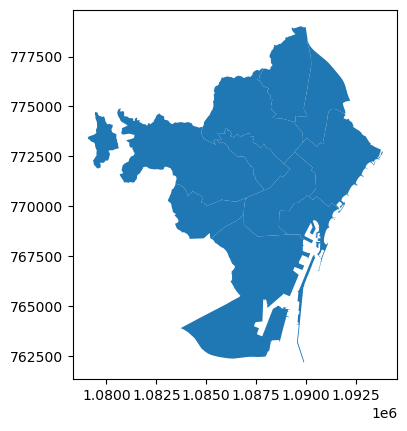

In [17]:
# plotting with geopandas
ax = gdf.plot()

In [32]:
gdf['DISTRICTE']

0    01
1    02
2    03
3    04
4    05
5    06
6    07
7    08
8    09
9    10
Name: DISTRICTE, dtype: object

In [19]:
# add district name 
district_name = ["District A", "District B", "District C", "District D", "District E", "District F", "District G", "District H", "District I", "District J"]

gdf["Districte_Name"] = district_name
gdf.columns


Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry', 'Calculated_Area', 'Centroid', 'Boundary',
       'sagrada_fam_dist', 'Districte_Name'],
      dtype='object')

<Axes: >

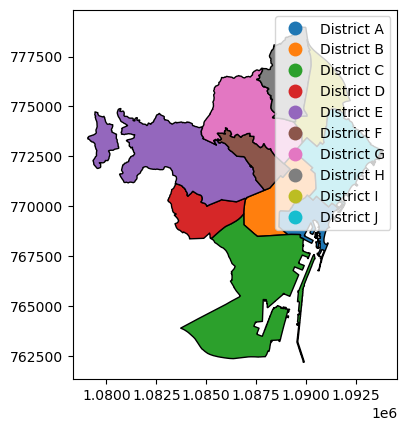

In [20]:
gdf.plot(column=gdf["Districte_Name"], legend=True, edgecolor="black")

<Axes: >

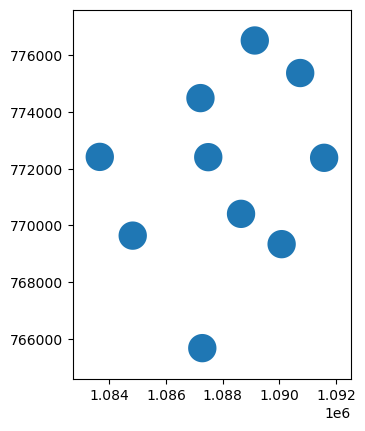

In [21]:
# buffer around the centroid 
buffer = geopandas.GeoSeries(gdf["Centroid"].buffer(500))

buffer.plot()

In [22]:
gdf.columns
print(type(gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>
